In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings


df=pd.read_csv("dataset.csv")
df.head()


,ID,SITENAME,Mg,PH,K(Potassium),NITRATE,SULPHATE,EC(Electrical Conductivity),Ca(Calcium),Na(Sodium),CARBONATE,BICARBONATE,CHLORIDE,FLUORIDE,SAR(Sodium Absorption Ratio),RSC(Residual Sodium Carbonate,waterQuality
0,1,Vengalapuram,268.0,7.3,10.0,276.0,304.0,5730,16.0,850,0,878.0,1304.0,1.6,10.9,-8.5,E
1,2,Kavalur,94.9,7.2,3.0,2.0,12.0,1069,24.0,77,0,421.0,163.0,1.3,1.6,-2.1,A
2,3,Alangayam,226.1,7.5,0.0,16.0,150.0,2830,20.0,300,0,549.0,631.0,1.0,4.2,-10.6,E
3,4,Vaniyambadi1,211.6,7.3,5.0,140.0,264.0,3600,20.0,500,0,726.0,680.0,1.7,7.2,-6.5,E
4,5,Sangilikuppam,238.3,7.2,2.0,174.0,240.0,2300,24.0,152,0,537.0,305.0,1.2,2.1,-12.0,E


In [2]:
#dataset description
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             88 non-null     int64  
 1   SITENAME                       88 non-null     object 
 2   Mg                             88 non-null     float64
 3   PH                             88 non-null     float64
 4   K(Potassium)                   88 non-null     float64
 5   NITRATE                        88 non-null     float64
 6   SULPHATE                       88 non-null     float64
 7   EC(Electrical Conductivity)    88 non-null     int64  
 8   Ca(Calcium)                    88 non-null     float64
 9   Na(Sodium)                     88 non-null     int64  
 10  CARBONATE                      88 non-null     int64  
 11  BICARBONATE                    88 non-null     float64
 12  CHLORIDE                       88 non-null     float

In [3]:
df['waterQuality'] = df['waterQuality'].replace(['A'],'1')
df['waterQuality'] = df['waterQuality'].replace(['B'],'2')
df['waterQuality'] = df['waterQuality'].replace(['C'],'3')
df['waterQuality'] = df['waterQuality'].replace(['D'],'4')
df['waterQuality'] = df['waterQuality'].replace(['E'],'5')
df.head()

,ID,SITENAME,Mg,PH,K(Potassium),NITRATE,SULPHATE,EC(Electrical Conductivity),Ca(Calcium),Na(Sodium),CARBONATE,BICARBONATE,CHLORIDE,FLUORIDE,SAR(Sodium Absorption Ratio),RSC(Residual Sodium Carbonate,waterQuality
0,1,Vengalapuram,268.0,7.3,10.0,276.0,304.0,5730,16.0,850,0,878.0,1304.0,1.6,10.9,-8.5,5
1,2,Kavalur,94.9,7.2,3.0,2.0,12.0,1069,24.0,77,0,421.0,163.0,1.3,1.6,-2.1,1
2,3,Alangayam,226.1,7.5,0.0,16.0,150.0,2830,20.0,300,0,549.0,631.0,1.0,4.2,-10.6,5
3,4,Vaniyambadi1,211.6,7.3,5.0,140.0,264.0,3600,20.0,500,0,726.0,680.0,1.7,7.2,-6.5,5
4,5,Sangilikuppam,238.3,7.2,2.0,174.0,240.0,2300,24.0,152,0,537.0,305.0,1.2,2.1,-12.0,5


In [4]:
y = df['waterQuality'].astype('int32')
x = df.drop(columns = ['SITENAME','ID','CARBONATE'], axis = 1)
model = x
model.head()

,Mg,PH,K(Potassium),NITRATE,SULPHATE,EC(Electrical Conductivity),Ca(Calcium),Na(Sodium),BICARBONATE,CHLORIDE,FLUORIDE,SAR(Sodium Absorption Ratio),RSC(Residual Sodium Carbonate,waterQuality
0,268.0,7.3,10.0,276.0,304.0,5730,16.0,850,878.0,1304.0,1.6,10.9,-8.5,5
1,94.9,7.2,3.0,2.0,12.0,1069,24.0,77,421.0,163.0,1.3,1.6,-2.1,1
2,226.1,7.5,0.0,16.0,150.0,2830,20.0,300,549.0,631.0,1.0,4.2,-10.6,5
3,211.6,7.3,5.0,140.0,264.0,3600,20.0,500,726.0,680.0,1.7,7.2,-6.5,5
4,238.3,7.2,2.0,174.0,240.0,2300,24.0,152,537.0,305.0,1.2,2.1,-12.0,5


In [5]:
model.describe()

,Mg,PH,K(Potassium),NITRATE,SULPHATE,EC(Electrical Conductivity),Ca(Calcium),Na(Sodium),BICARBONATE,CHLORIDE,FLUORIDE,SAR(Sodium Absorption Ratio),RSC(Residual Sodium Carbonate
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,94.137500,7.689773,61.107955,22.438636,159.804545,2406.261364,100.640909,289.965909,409.437500,482.642045,0.877273,4.779545,-6.022727
std,76.781452,0.430461,73.618456,51.947678,133.507084,1757.151584,84.905043,260.322675,181.804253,505.067066,0.442752,3.423387,7.497965
min,0.000000,6.800000,0.000000,0.000000,3.000000,346.000000,2.000000,20.000000,98.000000,25.000000,0.000000,0.500000,-35.100000
25%,35.950000,7.400000,3.000000,2.750000,57.250000,995.250000,39.000000,103.250000,268.000000,113.000000,0.500000,2.375000,-9.700000
50%,75.050000,7.600000,40.000000,10.000000,169.600000,2090.000000,80.000000,271.000000,402.500000,339.000000,1.000000,4.600000,-4.450000
75%,113.775000,7.800000,70.800000,18.100000,172.200000,3090.000000,123.500000,352.500000,499.750000,588.250000,1.100000,5.675000,-0.500000
max,350.100000,8.900000,315.000000,350.000000,744.000000,7440.000000,520.000000,1300.000000,970.000000,2183.000000,2.300000,16.800000,5.800000


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=45)

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = regressor.predict(X_test)
print(y_pred)

[5. 3. 5. 5. 3. 5. 4. 1. 3. 5. 1. 2. 2. 1. 2. 3. 5. 5. 3. 1. 3. 1.]


In [9]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
48,5,5.0
74,3,3.0
25,5,5.0
0,5,5.0
21,3,3.0
4,5,5.0
28,4,4.0
1,1,1.0
20,3,3.0
2,5,5.0


In [10]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.219646771412954e-15
Mean Squared Error: 2.0552964095971305e-29
Root Mean Squared Error: 4.533537702056894e-15


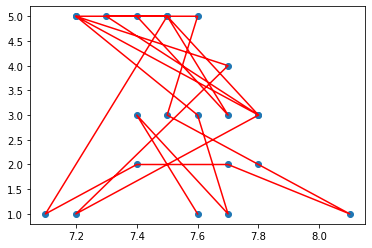

In [11]:
plt.scatter(X_test['PH'], y_test)
plt.plot(X_test['PH'], y_pred, color='red')
plt.show()